In [26]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

pd.set_option('display.max_columns', None)

#Upload from csv
school_attendance_path = "school_attendance.csv"
school_score_path = "nextgenacctcopy.csv"

#Read data and results
attendance_df = pd.read_csv(school_attendance_path)
score_df = pd.read_csv(school_score_path)

score_df.head()

,FallOfYear,RptngDistrictName,ReportingDistrictCode,SchoolName,SchoolCode,SchoolOrgType,SchoolLowGrade,SchoolHighGrade,SchoolTitleIType,Category,TotalPoints,TotalPossiblePoints,OutcomeRatePct,FinalCategory,AchievementGapFlag,Ind1ELA_All_Rate,Ind1ELA_All_Points,Ind1ELA_All_PossiblePoints,Ind1ELA_HN_Rate,Ind1ELA_NHN_Rate,Ind1ELA_HN_Points,Ind1ELA_HN_PossiblePoints,Ind1Math_All_Rate,Ind1Math_All_Points,Ind1Math_All_PossiblePoints,Ind1Math_NHN_Rate,Ind1Math_HN_Rate,Ind1Math_HN_Points,Ind1Math_HN_PossiblePoints,Ind1Sci_All_Rate,Ind1Sci_All_Points,Ind1Sci_All_PossiblePoints,Ind1Sci_HN_Rate,Ind1Sci_NHN_Rate,Ind1Sci_HN_Points,Ind1Sci_HN_PossiblePoints,Ind1ELAGap,Ind1MathGap,Ind1SciGap,Ind2ELA_All_Rate,Ind2ELA_All_Points,Ind2ELA_All_Possiblepoints,Ind2Math_All_Rate,Ind2Math_All_Points,Ind2Math_All_Possiblepoints,Ind2ELA_HN_Rate,Ind2ELA_NHN_Rate,Ind2ELA_HN_Points,Ind2ELA_HN_Possiblepoints,Ind2Math_HN_Rate,Ind2Math_NHN_Rate,Ind2Math_HN_Points,Ind2Math_HN_Possiblepoints,Ind2LEP_LTCY_Rate,Ind2LEP_LTCY_Points,Ind2LEP_LTCY_PossiblePoints,Ind2LEP_ORAL_Rate,Ind2LEP_ORAL_Points,Ind2LEP_ORAL_PossiblePoints,Ind3PartRateFlag,Ind3ELA_All_Rate,Ind3ELA_HN_Rate,Ind3ELA_NHN_Rate,Ind3Math_All_Rate,Ind3Math_HN_Rate,Ind3Math_NHN_Rate,Ind3Sci_All_Rate,Ind3Sci_HN_Rate,Ind3Sci_NHN_Rate,Ind4Rate,Ind4Points,Ind4PossiblePoints,Ind4HNRate,Ind4HNPoints,Ind4HNPossiblePoints,Ind5Rate,Ind5Points,Ind5PossiblePoints,Ind6Rate,Ind6Points,Ind6PossiblePoints,Ind7Rate,Ind7points,Ind7PointsPossible,Ind8Rate,Ind8Points,Ind8PointsPossible,GradGapFlag,Ind9Rate,Ind9Points,Ind9PointsPossible,Ind10Rate,Ind10Points,Ind10PossiblePoints,Ind11FitnessRate,Ind11ParticipationRate,Ind11Points,Ind11PossiblePoints,Ind12Rate,Ind12Points,Ind12PossiblePoints,Grad6YrRateHN,Grad6YrRateNHN,Grad6YrHNNHNDiff,Hurdle_Mean_ELA,Hurdle_Mean_Math,Hurdle_Mean_Sci,Hurdle_Means_Grad,CategoryDropFlag,Support,SupportCategory,Distinction,DistinctionCategory,Perform,ELA_ALL_YN,Math_ALL_YN,ELA_HN_YN,Math_HN_YN,Improve,schoolyear
0,2022.0,Barkhamsted School District,"=""0050011""",District,"=""0000000""",District,District,District,NaN,DistrictTot,582.816516,800.0,72.852065,.,0.000000,72.713861,48.475907,50.000000,63.393911,75.000000,42.262607,50.000000,70.364000,46.909333,50.000000,75.000000,62.229971,41.486647,50.000000,73.670395,49.113597,50.000000,.,.,.,.,11.600000,12.770000,.,0.622521,62.252081,100.000000,0.694018,69.401770,100.000000,0.503999,0.737923,50.399922,100.000000,0.639023,0.747566,63.902262,100.000000,.,.,.,.,.,.,0.000000,0.990654,0.981132,1.000000,0.990654,0.981132,1.000000,1.000000,.,.,0.123077,35.384615,50.000000,0.139535,32.093023,50.000000,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0.617021,0.979167,41.134752,50.000000,.,.,.,.,.,.,16.556950,18.000178,17.794960,.,.,NaN,NaN,NaN,NaN,.,.,.,.,.,.,2022-23
1,2022.0,Berlin School District,"=""0070011""",District,"=""0000000""",District,District,District,NaN,DistrictTot,1123.612665,1450.0,77.490529,.,0.000000,70.521521,47.014347,50.000000,60.828432,75.000000,40.552288,50.000000,68.759462,45.839642,50.000000,74.401549,58.221856,38.814571,50.000000,68.655881,45.770588,50.000000,57.631688,73.607194,38.421126,50.000000,14.170000,16.170000,15.970000,0.601851,60.185118,100.000000,0.744972,74.497182,100.000000,0.514310,0.644308,51.430989,100.000000,0.655275,0.788254,65.527453,100.000000,0.746437,37.321866,50.000000,0.710510,35.525499,50.000000,0.000000,0.983309,0.970179,0.990857,0.977520,0.960239,0.987443,0.978583,0.950249,0.992611,0.153962,29.207547,50.000000,0.253491,9.301826,50.000000,0.884187,50.000000,50.000000,0.612472,40.831477,50.000000,0.963592,50.000000,50.000000,0.939252,99.920461,100.000000,0.000000,0.957143,100.000000,100.000000,0.781000,100.000000,100.000000,0.532012,0.794012,17.733740,50.000000,0.548603,45.716946,50.000000,0.957143,0.940000,0.000000,16.556950,18.000178,17.794960,8.744504,.,NaN,NaN,NaN,NaN,.,.,.,.,.,.,2022-23
2,2022.0,Stamford Charter School for Excellence District,"=""2960013""",District,"=""0000000""",District,District,District,NaN

In [6]:
#Look at columns
score_df.columns

Index(['FallOfYear', 'RptngDistrictName', 'ReportingDistrictCode',
       'SchoolName', 'SchoolCode', 'SchoolOrgType', 'SchoolLowGrade',
       'SchoolHighGrade', 'SchoolTitleIType', 'Category',
       ...
       'SupportCategory', 'Distinction', 'DistinctionCategory', 'Perform',
       'ELA_ALL_YN', 'Math_ALL_YN', 'ELA_HN_YN', 'Math_HN_YN', 'Improve',
       'schoolyear'],
      dtype='object', length=120)

In [54]:
#Reduced to columns I need
score_reduced_df = score_df[['RptngDistrictName', "OutcomeRatePct"]]

score_reduced_df.head()

,RptngDistrictName,OutcomeRatePct
0,Barkhamsted School District,72.852065
1,Berlin School District,77.490529
2,Stamford Charter School for Excellence District,76.175198
3,Capital Preparatory Harbor School District,68.441429
4,Unified School District #1,14.306113


In [55]:
#Count number of districts
name_unique = score_reduced_df["RptngDistrictName"].value_counts()
name_count = len(name_unique)
name_count

201

In [56]:
#Rename column
score_reduced_df = score_reduced_df.rename(columns={"RptngDistrictName": "District name"})

score_reduced_df.head()

,District name,OutcomeRatePct
0,Barkhamsted School District,72.852065
1,Berlin School District,77.490529
2,Stamford Charter School for Excellence District,76.175198
3,Capital Preparatory Harbor School District,68.441429
4,Unified School District #1,14.306113


In [57]:
#Check Count
score_reduced_df.count()

District name     1202
OutcomeRatePct    1202
dtype: int64

In [153]:
#Export to csv
score_reduced_df.to_csv("score.csv")

In [58]:
attendance_df.head()

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022


In [73]:
#Reduce Attendance Frame
attendance_reduced_df = attendance_df[["District name","Student group","2021-2022 attendance rate - year to date"] ]

attendance_reduced_df.head()

,District name,Student group,2021-2022 attendance rate - year to date
0,Connecticut,All Students,0.9169
1,Connecticut,Students Experiencing Homelessness,0.8348
2,Connecticut,Students With Disabilities,0.8899
3,Connecticut,Free Meal Eligible,0.8851
4,Connecticut,Reduced Price Meal Eligible,0.9184


In [74]:
#Filter to all students
attendance_filtered_df = attendance_reduced_df.loc[(attendance_reduced_df["Student group"]=="All Students")]
attendance_filtered_df.head()

,District name,Student group,2021-2022 attendance rate - year to date
0,Connecticut,All Students,0.9169
13,Andover School District,All Students,0.9386
19,Ansonia School District,All Students,0.9045
31,Ashford School District,All Students,0.9309
40,Avon School District,All Students,0.9457


In [75]:
#Drop Connecticut
attendance_dropped_df = attendance_filtered_df.drop(0)
attendance_dropped_df.head()

,District name,Student group,2021-2022 attendance rate - year to date
13,Andover School District,All Students,0.9386
19,Ansonia School District,All Students,0.9045
31,Ashford School District,All Students,0.9309
40,Avon School District,All Students,0.9457
52,Barkhamsted School District,All Students,0.9305


In [76]:
#Merge Data Sets
merged_df = pd.merge(attendance_dropped_df, score_reduced_df, on="District name", how = "right")

merged_df

,District name,Student group,2021-2022 attendance rate - year to date,OutcomeRatePct
0,Barkhamsted School District,All Students,0.9305,72.852065
1,Berlin School District,All Students,0.9341,77.490529
2,Stamford Charter School for Excellence District,All Students,0.9308,76.175198
3,Capital Preparatory Harbor School District,All Students,0.9102,68.441429
4,Unified School District #1,All Students,0.9564,14.306113
...,...,...,...,...
1197,Connecticut Technical Education and Career System,All Students,0.8985,66.280067
1198,Norwich Free Academy District,All Students,0.8940,63.271023
1199,The Gilbert School District,All Students,0.8901,61.324493
1200,The Woodstock Academy District,All Students,0.9288,72.663022


In [77]:
#Check counts
merged_df.count()

District name                               1202
Student group                               1201
2021-2022 attendance rate - year to date    1201
OutcomeRatePct                              1202
dtype: int64

In [80]:
#Drop duplicates and check counts
merged_df = merged_df.drop_duplicates(subset=["District name"])

#Drop null values
merged_df = merged_df.dropna()
merged_df.count()

District name                               200
Student group                               200
2021-2022 attendance rate - year to date    200
OutcomeRatePct                              200
dtype: int64

0.6097053436135759


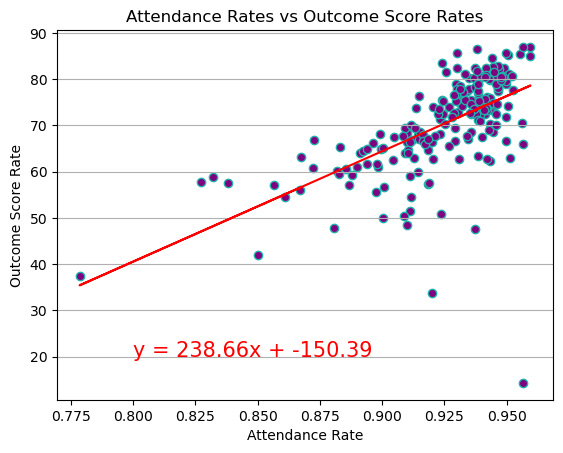

In [92]:
#Scatter plot
x_values = merged_df["2021-2022 attendance rate - year to date"]
y_values = merged_df["OutcomeRatePct"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors="lightseagreen", facecolors = "purple")
plt.plot(x_values,regress_values,"r-")
plt.grid(axis="y")
plt.xlabel('Attendance Rate')
plt.ylabel('Outcome Score Rate')
plt.title("Attendance Rates vs Outcome Score Rates")
plt.annotate(line_eq,(0.8,20),fontsize=15, color = "red")
plt.savefig("Images/ScoreVsRateScatter.png")
print(rvalue)
plt.show()

In [99]:
#Bins for histogram
max_count = merged_df["OutcomeRatePct"].max()
min_count = merged_df["OutcomeRatePct"].min()
median = merged_df["OutcomeRatePct"].median()


#Print
print(f"The maximum count is {max_count} and the minimum count is {min_count}. The median is {median}")
      
      

The maximum count is 86.961845 and the minimum count is 14.306113. The median is 72.4414035


In [103]:
#Create bins
bins=[0, 50, 60, 70, 80, 90]

#Names
bin_names = ["0%-50%", "51%-60%", "61%-70%", "71%-80%", "81%-90%"]

#Place into bins
merged_df["Bins"] = pd.cut(merged_df["OutcomeRatePct"], bins,
                          labels=bin_names, include_lowest = True)

merged_df.head()

,District name,Student group,2021-2022 attendance rate - year to date,OutcomeRatePct,Bins
0,Barkhamsted School District,All Students,0.9305,72.852065,71%-80%
1,Berlin School District,All Students,0.9341,77.490529,71%-80%
2,Stamford Charter School for Excellence District,All Students,0.9308,76.175198,71%-80%
3,Capital Preparatory Harbor School District,All Students,0.9102,68.441429,61%-70%
4,Unified School District #1,All Students,0.9564,14.306113,0%-50%


In [146]:
#Check group sizes
bin_counts = merged_df["Bins"].value_counts()
bin_counts_1 = bin_counts.sort_index()
bin_counts_1

Bins
0%-50%      8
51%-60%    19
61%-70%    59
71%-80%    80
81%-90%    34
Name: count, dtype: int64

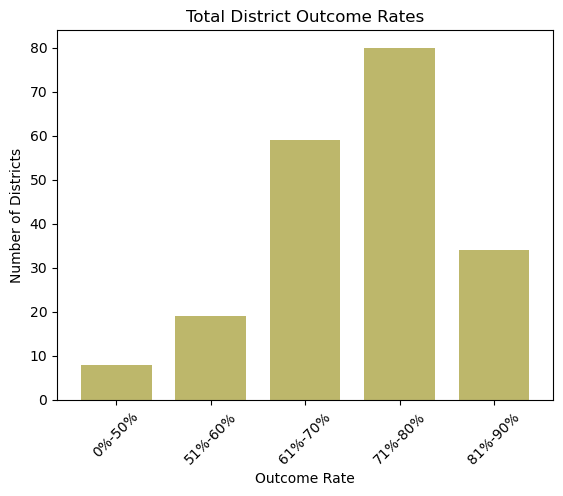

In [148]:
#Bar Graph
bin_counts_1.plot(kind="bar", width=0.75, color = "darkkhaki", rot = 45)

#Labels
plt.title("Total District Outcome Rates")
plt.xlabel("Outcome Rate")
plt.ylabel("Number of Districts")

plt.savefig("Images/BinOutcomeRate.png", bbox_inches = "tight")

plt.show()

In [125]:
data=[]
for number in merged_df["OutcomeRatePct"]:
    data.append(number)
    
data

[72.852065,
 77.490529,
 76.175198,
 68.441429,
 14.306113,
 75.38026,
 70.295879,
 72.354022,
 47.649363,
 77.838012,
 50.742408,
 71.294458,
 67.857593,
 74.785591,
 60.236447,
 63.991626,
 82.360334,
 66.706637,
 76.060529,
 64.420739,
 61.002631,
 68.605309,
 68.131278,
 75.028119,
 66.111246,
 78.345453,
 33.6792,
 80.32932,
 57.13963,
 73.562339,
 77.77193,
 59.172273,
 73.344798,
 75.483374,
 79.767976,
 73.919613,
 85.172441,
 81.512506,
 74.209612,
 69.402917,
 77.400081,
 82.410197,
 66.150972,
 86.424197,
 77.606511,
 61.740711,
 61.080922,
 72.634924,
 62.945381,
 72.443447,
 73.232773,
 66.817166,
 75.590589,
 67.045459,
 85.099288,
 75.845325,
 74.528559,
 68.550802,
 68.153037,
 73.118631,
 74.379678,
 58.994106,
 57.156462,
 74.461247,
 64.077963,
 72.59368,
 56.669873,
 80.293692,
 70.152162,
 62.751617,
 68.940921,
 78.894501,
 85.748934,
 57.42327,
 67.53257,
 75.54829,
 67.842681,
 66.943666,
 73.767644,
 64.814891,
 73.867475,
 82.50768,
 76.421478,
 74.652177,
 74

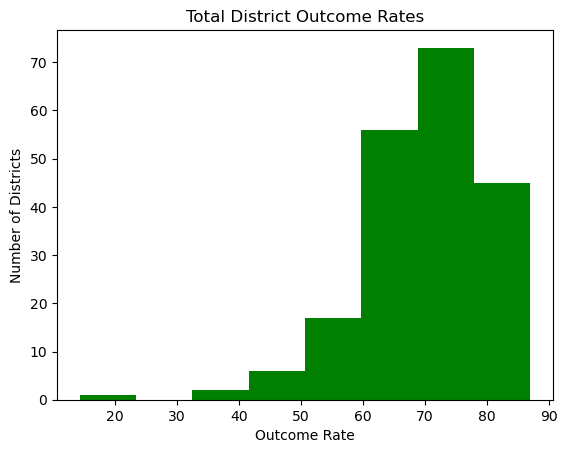

In [152]:
plt.hist(data, color="green", bins=8)

plt.title("Total District Outcome Rates")
plt.xlabel("Outcome Rate")
plt.ylabel("Number of Districts")
plt.savefig("Images/HisOutcomeRate.png", bbox_inches = "tight")
plt.show()